#决策可视化

In [33]:
#下文只描绘2024年的种植决策
import pandas as pd 
data = pd.read_csv('../re333.csv')
data_2024= data[data["年份"] == 2024]

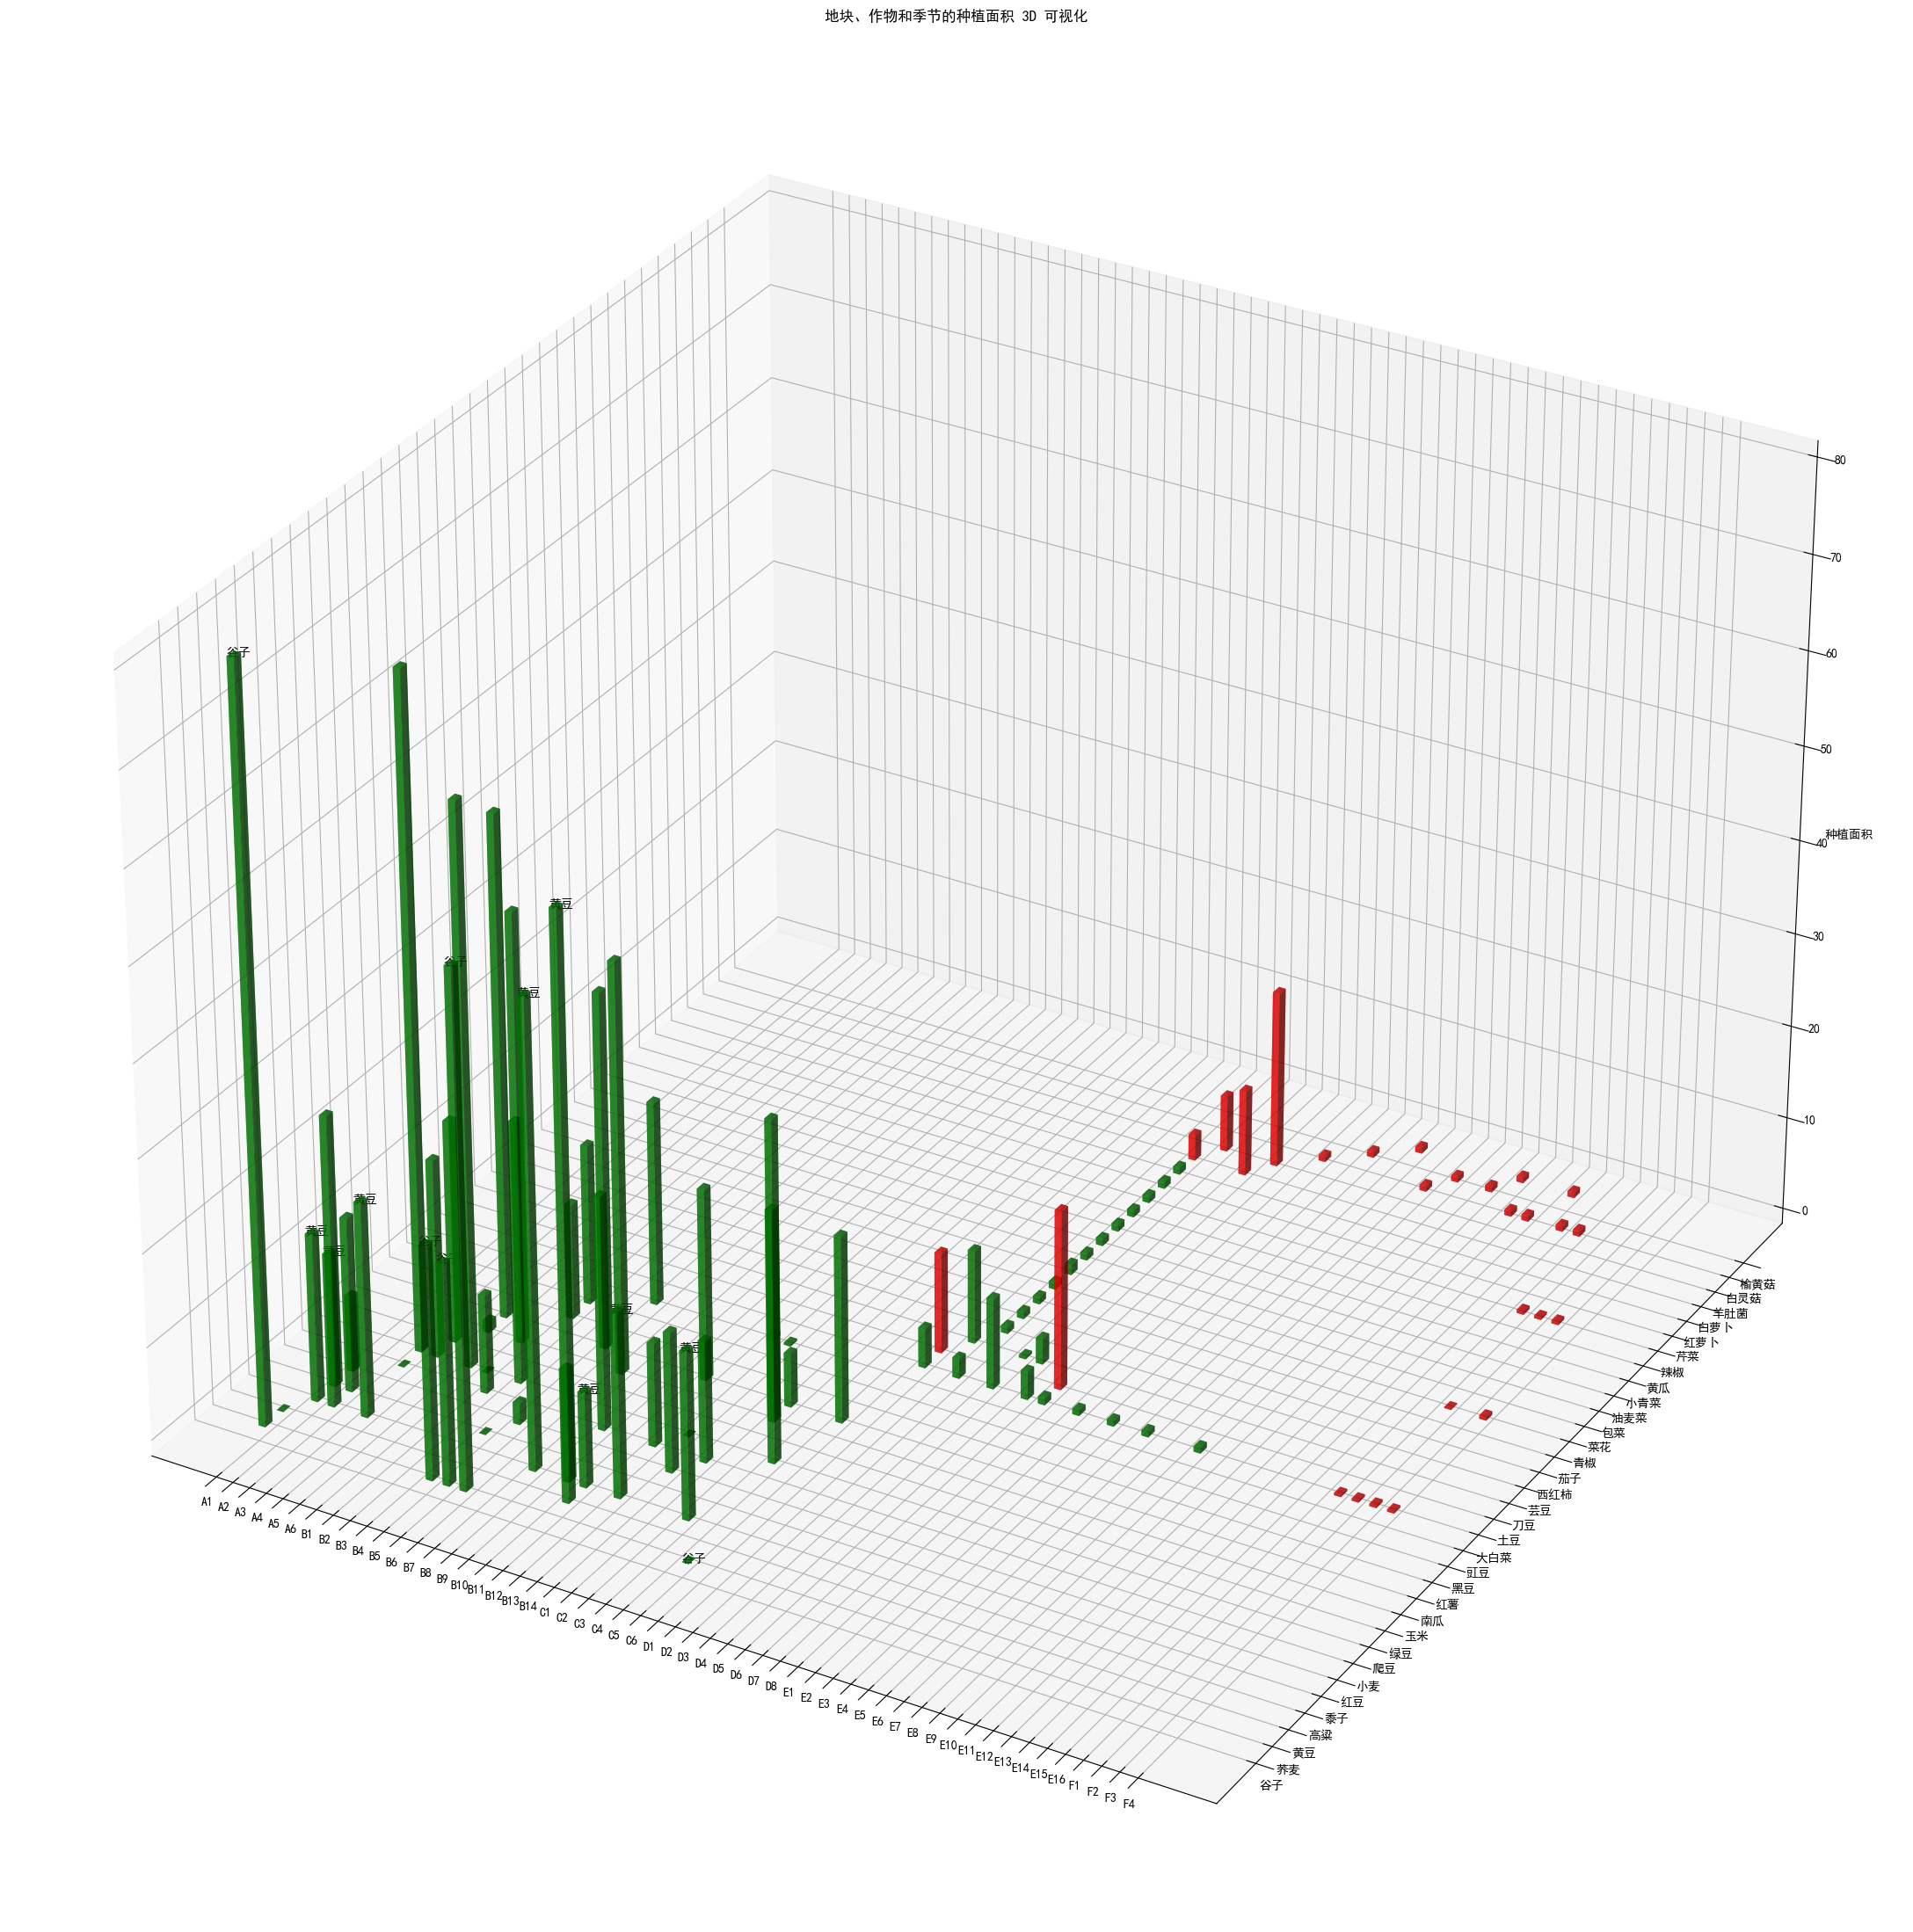

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

# 设置中文字体
# 使用 SimHei 字体 (黑体)，你可以根据系统的字体选择其他支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号 '-' 显示为方块的问题


# 创建 DataFrame
df = data_2024

# 获取唯一的地块和作物名
plots = df['地块名'].unique()
crops = df['作物名'].unique()

# 设置颜色区分季节
colors = ['g', 'r']  # 绿色表示第1季，红色表示第2季

# 创建3D图
fig = plt.figure(figsize=(42, 28))
ax = fig.add_subplot(111, projection='3d')

# 为每个地块和作物绘制不同的条形图
for i, plot in enumerate(plots):
    for j, crop in enumerate(crops):
        # 获取每个地块名和作物名对应的数据
        crop_data = df[(df['地块名'] == plot) & (df['作物名'] == crop)]
        
        # 绘制第1季和第2季的条形图，区分颜色
        for k, season in enumerate([1, 2]):
            season_data = crop_data[crop_data['季节'] == season]
            if not season_data.empty:
                area = season_data['种植面积'].values[0] if len(season_data) > 0 else 0
                ax.bar3d(i, j, 0, 0.4, 0.4, area, color=colors[k], alpha=0.6)
                
                # 为关键作物标注中文标签
                if crop in ['谷子', '黄豆'] and season == 1:
                    ax.text(i, j, area, f'{crop}', color='black', fontsize=10)

# 设置标签
ax.set_xticks(np.arange(len(plots)))
ax.set_xticklabels(plots)
ax.set_yticks(np.arange(len(crops)))
ax.set_yticklabels(crops)
ax.set_zlabel('种植面积')

# 设置标题
ax.set_title('地块、作物和季节的种植面积 3D 可视化')

# 保存为矢量图 (SVG 格式)
plt.savefig("crop_planting_pro3_2024.svg", format='svg')

# 显示图表
plt.show()
